<a href="https://colab.research.google.com/github/larissavvsous/Mineracao-de-Dados/blob/main/Ativ_cluster_24jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Larissa Vitória Vasconcelos Sousa

### Criando a base de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

dados = {
    'id': ["cli1", "cli2", "cli3", "cli4", "cli5", "cli6"],
    'Frequencia': [3, 3, 4, 2, 3, 1],
    'Consumo': [120.50, 130.00, 150.80, 75.60, 88.50, 58.80],
    'Pgto': [1, 1, 1, 2, 2, 2]   # 1 = debito, 2 = credito
}

df = pd.DataFrame(dados)
df

,id,Frequencia,Consumo,Pgto
0,cli1,3,120.5,1
1,cli2,3,130.0,1
2,cli3,4,150.8,1
3,cli4,2,75.6,2
4,cli5,3,88.5,2
5,cli6,1,58.8,2


### Normalizando

In [ ]:
from sklearn.preprocessing import MinMaxScaler    # normalizando

colunas_para_normalizar = ['Frequencia', 'Consumo', 'Pgto']
dados_normalizados = df[colunas_para_normalizar]
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados_normalizados)
dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=colunas_para_normalizar)
dados_normalizados_df = dados_normalizados_df.round(2)
#dados_normalizados_df['id'] = df['id']
dados_normalizados_df

,Frequencia,Consumo,Pgto
0,0.67,0.67,0.0
1,0.67,0.77,0.0
2,1.00,1.00,0.0
3,0.33,0.18,1.0
4,0.67,0.32,1.0
5,0.00,0.00,1.0


### Matriz de similaridade

In [ ]:
matriz_similaridade = linkage(dados_normalizados_df, method='single', metric='euclidean')
matriz_similaridade = np.round(matriz_similaridade, decimals=2)

### Dendograma

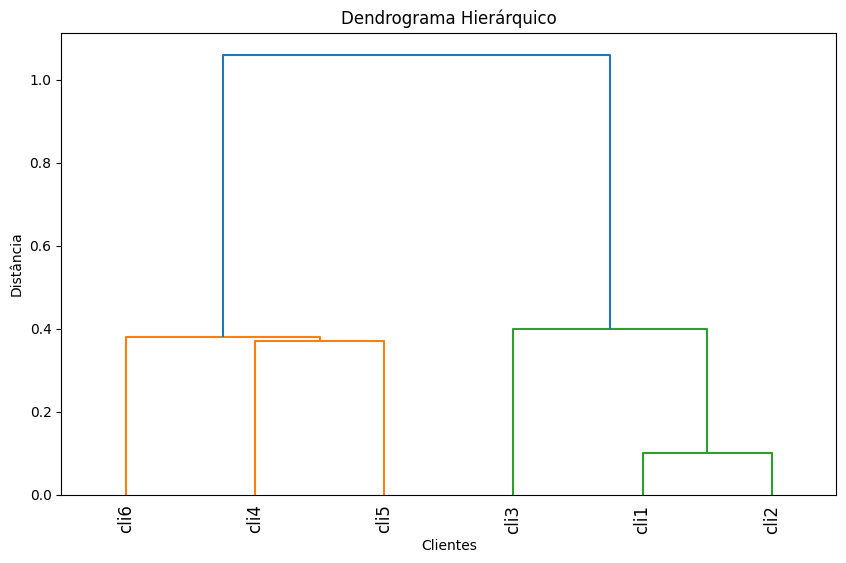

In [ ]:
plt.figure(figsize=(10, 6))
dendrogram(matriz_similaridade, labels=dados['id'], leaf_rotation=90)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.show()